# Tanpa Metode Numerik

In [11]:
import math  # Mengimpor modul matematika untuk perhitungan matematis

class AircraftPerformance:
    def __init__(self, isa_deviation=0):
        self.isa_deviation = isa_deviation  # Menyimpan deviasi ISA (International Standard Atmosphere) sebagai properti objek

    def air_density(self, altitude):
        TO = 288.15  # Suhu standar pada permukaan laut dalam Kelvin (K)
        R = 287.05   # Konstanta gas untuk udara dalam J/(kg·K)
        L = 0.0065   # Laju penurunan suhu dengan ketinggian dalam K/m

        T = TO - L * altitude  # Menghitung suhu pada ketinggian tertentu dalam Kelvin (K)

        rho = 1.225 * (T / TO) ** (5.2561)  # Menghitung massa jenis udara pada ketinggian tertentu dalam kg/m³

        return rho + self.isa_deviation  # Mengembalikan massa jenis udara yang sudah dikoreksi dengan deviasi ISA

    def stall_speed(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung kecepatan stall dalam m/s menggunakan formula yang relevan
        stall_speed = math.sqrt((2 * self.weight) / (rho * self.S * self.cl_max))
        return stall_speed

    def max_rate_of_climb(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung laju pendakian maksimum dalam m/s menggunakan formula yang relevan
        max_rate_of_climb = (2 * self.P_max_sea_level) / (rho * self.S * math.sqrt(self.C_D0 / self.cl_max))
        return max_rate_of_climb

    def max_range(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung jarak maksimum dalam meter menggunakan formula yang relevan
        max_range = (2 / math.sqrt(self.C_D0 * self.K)) * math.sqrt(self.cl_max / rho) * (self.P_max_sea_level / self.weight)
        return max_range

    def max_endurance(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung daya tahan maksimum dalam detik menggunakan formula yang relevan
        max_endurance = (2 * math.sqrt(self.cl_max / self.C_D0)) * math.sqrt(rho / self.K) * math.sqrt(self.weight / self.P_max_sea_level)
        return max_endurance
    
    def user_interface(self):
        print("Aircraft Performance Calculator")  # Menampilkan judul kalkulator

        altitude = float(input("Enter the altitude (m): "))  # Meminta pengguna memasukkan ketinggian dalam meter

        print("\nCalculating performance metrics at altitude: ", altitude, "m\n")
        print("Stall Speed: ", round(self.stall_speed(altitude), 2), "m/s")  # Menampilkan kecepatan stall dalam m/s
        print("Maximum Rate of Climb: ", round(self.max_rate_of_climb(altitude), 2), "m/s")  # Menampilkan laju pendakian maksimum dalam m/s
        print("Maximum Range: ", round(self.max_range(altitude), 2), "m")  # Menampilkan jarak maksimum dalam meter
        print("Maximum Endurance: ", round(self.max_endurance(altitude), 2), "s")  # Menampilkan daya tahan maksimum dalam detik

class_data = {
    'weight': 1019,  # Berat pesawat dalam kg
    'S': 16.2,  # Luas sayap pesawat dalam m²
    'cl_max': 1.5,  # Koefisien lift maksimum
    'P_max_sea_level': 224,  # Daya maksimum mesin pada permukaan laut dalam kW
    'C_D0': 0.03,  # Koefisien drag nol-lift
    'K': 0.04  # Faktor efisiensi induksi
}

if __name__ == "__main__":
    aircraft = AircraftPerformance()  # Membuat objek dari kelas AircraftPerformance
    
    # Mengatur setiap properti dari class_data ke objek aircraft
    for key, value in class_data.items():
        setattr(aircraft, key, value)

    aircraft.user_interface()  # Memanggil metode user_interface untuk menjalankan program

Aircraft Performance Calculator

Calculating performance metrics at altitude:  10000.0 m

Stall Speed:  16.2 m/s
Maximum Rate of Climb:  611.86 m/s
Maximum Range:  27.5 m
Maximum Endurance:  85.26 s


## Penjelasan

Program tersebut adalah sebuah kalkulator performa pesawat yang memungkinkan pengguna untuk menganalisis kinerja pesawat pada ketinggian tertentu. Pengguna dapat menghitung beberapa parameter performa pesawat yang penting dengan memasukkan nilai ketinggian. Ini mencakup kecepatan stall, yang merupakan kecepatan terendah yang dapat dipertahankan pesawat dalam penerbangan level sebelum mengalami stall. Program juga menghitung laju pendakian maksimum, yang merupakan laju vertikal tertinggi yang dapat dicapai pesawat. Selanjutnya, program menghitung daya tahan maksimum, yang merupakan waktu terpanjang yang pesawat dapat terbang dengan bahan bakar tersisa. Oleh karena itu, program ini meningkatkan pemahaman tentang bagaimana pesawat berfungsi dalam berbagai kondisi cuaca dan cuaca. Ini penting untuk perencanaan penerbangan, evaluasi keamanan, dan pengoptimalan operasional.

1. Pada `air_density` menggunakan rumus massa jenis udara $ \rho = 1.225 \left(\frac{T}{T_0}\right)^{5.2561} $. Formula tersebut menghitung massa jenis udara pada ketinggian tertentu berdasarkan suhu standar atmosfer. 


2. Pada `stall_speed` menggunakan rumus $ V_{stall} = \sqrt{\frac{2 \times W}{\rho \times S \times C_{L\_max}}} $


3. Pada `max_rate_of_climb` menggunakan rumus $ ROC_{max} = \frac{2 \times P_{max\_sea\_level}}{\rho \times S \times \sqrt{\frac{C_{D0}}{C_{L\_max}}}} $


4. Pada rumus jarak maksimum (`max_range`) menggunakan rumus $ Range_{max} = \left( \frac{2}{\sqrt{C_{D0} \times K}} \right) \times \sqrt{\frac{C_{L\_max}}{\rho}} \times \left( \frac{P_{max\_sea\_level}}{W} \right) $


5. Pada daya tahan maksimum (`max_endurance`) menggunakan rumus $ Endurance_{max} = 2 \times \sqrt{\frac{C_{L\_max}}{C_{D0}}} \times \sqrt{\frac{\rho}{K}} \times \sqrt{\frac{W}{P_{max\_sea\_level}}} $

# Metode Numerik (Interpolasi Linear)

Aircraft Performance Calculator

Calculating performance metrics at altitude:  10000.0 m

Stall Speed:  11.33 m/s
Maximum Rate of Climb:  299.42 m/s
Maximum Range:  19.23 m
Maximum Endurance:  121.88 s


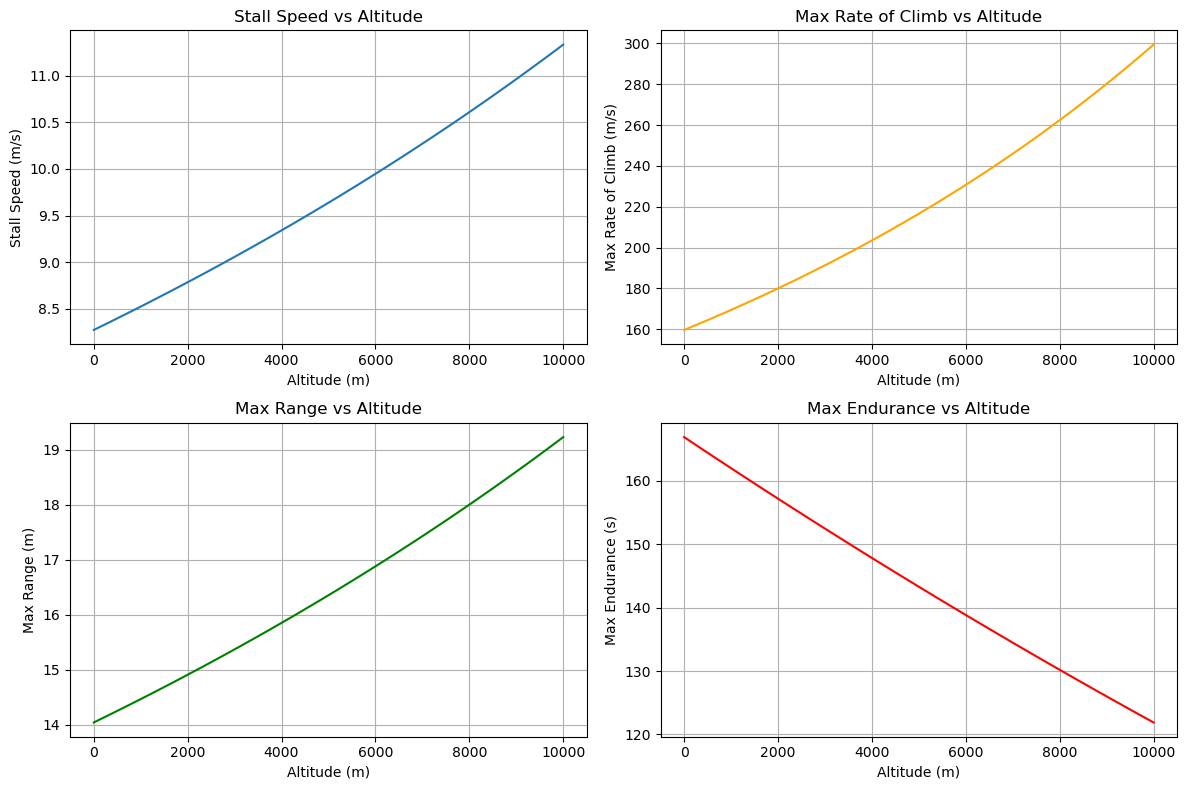

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

class AircraftPerformance:
    def __init__(self, isa_deviation=0):
        self.isa_deviation = isa_deviation  # Menyimpan deviasi ISA (International Standard Atmosphere) sebagai properti objek
        
        # Data ketinggian dan suhu untuk interpolasi
        self.altitudes = [0, 2000, 4000, 6000, 8000, 10000]  # m
        self.temperatures = [288.15, 281.65, 275.15, 268.65, 262.15, 255.65]  # K

    def interpolate_temperature(self, altitude):
        # Interpolasi linear untuk mencari suhu pada ketinggian tertentu
        altitude = min(max(altitude, min(self.altitudes)), max(self.altitudes))
        return np.interp(altitude, self.altitudes, self.temperatures)

    def air_density(self, altitude):
        T = self.interpolate_temperature(altitude)  # Menghitung suhu pada ketinggian tertentu

        # Menghitung massa jenis udara pada ketinggian tertentu dalam kg/m³
        rho = 1.225 * (T / 288.15) ** (5.2561)

        return rho + self.isa_deviation  # Mengembalikan massa jenis udara yang sudah dikoreksi dengan deviasi ISA

    def stall_speed(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung kecepatan stall dalam m/s menggunakan formula yang relevan
        stall_speed = math.sqrt((2 * self.weight) / (rho * self.S * self.cl_max))
        return stall_speed

    def max_rate_of_climb(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung laju pendakian maksimum dalam m/s menggunakan formula yang relevan
        max_rate_of_climb = (2 * self.P_max_sea_level) / (rho * self.S * math.sqrt(self.C_D0 / self.cl_max))
        return max_rate_of_climb

    def max_range(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung jarak maksimum dalam meter menggunakan formula yang relevan
        max_range = (2 / math.sqrt(self.C_D0 * self.K)) * math.sqrt(self.cl_max / rho) * (self.P_max_sea_level / self.weight)
        return max_range

    def max_endurance(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung daya tahan maksimum dalam detik menggunakan formula yang relevan
        max_endurance = (2 * math.sqrt(self.cl_max / self.C_D0)) * math.sqrt(rho / self.K) * math.sqrt(self.weight / self.P_max_sea_level)
        return max_endurance
    
    def calculate_metrics(self, altitude):
        return {
            "stall_speed": self.stall_speed(altitude),
            "max_rate_of_climb": self.max_rate_of_climb(altitude),
            "max_range": self.max_range(altitude),
            "max_endurance": self.max_endurance(altitude),
        }

    def user_interface(self):
        print("Aircraft Performance Calculator")  # Menampilkan judul kalkulator

        altitude = float(input("Enter the altitude (m): "))  # Meminta pengguna memasukkan ketinggian dalam meter

        print("\nCalculating performance metrics at altitude: ", altitude, "m\n")
        metrics = self.calculate_metrics(altitude)
        print("Stall Speed: ", round(metrics["stall_speed"], 2), "m/s")  # Menampilkan kecepatan stall dalam m/s
        print("Maximum Rate of Climb: ", round(metrics["max_rate_of_climb"], 2), "m/s")  # Menampilkan laju pendakian maksimum dalam m/s
        print("Maximum Range: ", round(metrics["max_range"], 2), "m")  # Menampilkan jarak maksimum dalam meter
        print("Maximum Endurance: ", round(metrics["max_endurance"], 2), "s")  # Menampilkan daya tahan maksimum dalam detik

    def plot_performance(self):
        altitudes = np.linspace(0, 10000, 100)  # Buat array ketinggian dari 0 hingga 10000 meter
        stall_speeds = []
        max_rate_of_climbs = []
        max_ranges = []
        max_endurances = []

        for altitude in altitudes:
            metrics = self.calculate_metrics(altitude)
            stall_speeds.append(metrics["stall_speed"])
            max_rate_of_climbs.append(metrics["max_rate_of_climb"])
            max_ranges.append(metrics["max_range"])
            max_endurances.append(metrics["max_endurance"])

        plt.figure(figsize=(12, 8))
        plt.subplot(2, 2, 1)
        plt.plot(altitudes, stall_speeds, label='Stall Speed')
        plt.xlabel('Altitude (m)')
        plt.ylabel('Stall Speed (m/s)')
        plt.title('Stall Speed vs Altitude')
        plt.grid(True)

        plt.subplot(2, 2, 2)
        plt.plot(altitudes, max_rate_of_climbs, label='Max Rate of Climb', color='orange')
        plt.xlabel('Altitude (m)')
        plt.ylabel('Max Rate of Climb (m/s)')
        plt.title('Max Rate of Climb vs Altitude')
        plt.grid(True)

        plt.subplot(2, 2, 3)
        plt.plot(altitudes, max_ranges, label='Max Range', color='green')
        plt.xlabel('Altitude (m)')
        plt.ylabel('Max Range (m)')
        plt.title('Max Range vs Altitude')
        plt.grid(True)

        plt.subplot(2, 2, 4)
        plt.plot(altitudes, max_endurances, label='Max Endurance', color='red')
        plt.xlabel('Altitude (m)')
        plt.ylabel('Max Endurance (s)')
        plt.title('Max Endurance vs Altitude')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

class_data = {
    'weight': 1019,  # Berat pesawat dalam kg
    'S': 16.2,  # Luas sayap pesawat dalam m²
    'cl_max': 1.5,  # Koefisien lift maksimum
    'P_max_sea_level': 224,  # Daya maksimum mesin pada permukaan laut dalam kW
    'C_D0': 0.03,  # Koefisien drag nol-lift
    'K': 0.04  # Faktor efisiensi induksi
}

if __name__ == "__main__":
    aircraft = AircraftPerformance()  # Membuat objek dari kelas AircraftPerformance
    
    # Mengatur setiap properti dari class_data ke objek aircraft
    for key, value in class_data.items():
        setattr(aircraft, key, value)

    aircraft.user_interface()  # Memanggil metode user_interface untuk menjalankan program
    aircraft.plot_performance()  # Menampilkan plot performa pesawat

## Penjelasan

saya akan menggunakan program ini menjadi bahan utama untuk membuat projek laporan yang berisi abstrak, dasar teori, metode, serta hasil dan analisis

# Metode Numerik (Euler)

In [1]:
import math

class AircraftPerformance:
    def __init__(self, isa_deviation=0):
        self.isa_deviation = isa_deviation  # Menyimpan deviasi ISA (International Standard Atmosphere) sebagai properti objek

    def air_density(self, altitude):
        TO = 288.15  # Suhu standar pada permukaan laut dalam Kelvin (K)
        R = 287.05   # Konstanta gas untuk udara dalam J/(kg·K)
        L = 0.0065   # Laju penurunan suhu dengan ketinggian dalam K/m

        T = TO  # Suhu pada permukaan laut dalam Kelvin (K)
        h = 100  # Langkah iterasi untuk Metode Euler
        
        # Iterasi Metode Euler untuk menghitung suhu pada ketinggian tertentu
        while altitude > 0:
            T -= L * h
            altitude -= h

        rho = 1.225 * (T / TO) ** (5.2561)  # Menghitung massa jenis udara pada ketinggian tertentu dalam kg/m³

        return rho + self.isa_deviation  # Mengembalikan massa jenis udara yang sudah dikoreksi dengan deviasi ISA

    def stall_speed(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung kecepatan stall dalam m/s menggunakan formula yang relevan
        stall_speed = math.sqrt((2 * self.weight) / (rho * self.S * self.cl_max))
        return stall_speed

    def max_rate_of_climb(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung laju pendakian maksimum dalam m/s menggunakan formula yang relevan
        max_rate_of_climb = (2 * self.P_max_sea_level) / (rho * self.S * math.sqrt(self.C_D0 / self.cl_max))
        return max_rate_of_climb

    def max_range(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung jarak maksimum dalam meter menggunakan formula yang relevan
        max_range = (2 / math.sqrt(self.C_D0 * self.K)) * math.sqrt(self.cl_max / rho) * (self.P_max_sea_level / self.weight)
        return max_range

    def max_endurance(self, altitude):
        rho = self.air_density(altitude)  # Mendapatkan massa jenis udara pada ketinggian tertentu

        # Menghitung daya tahan maksimum dalam detik menggunakan formula yang relevan
        max_endurance = (2 * math.sqrt(self.cl_max / self.C_D0)) * math.sqrt(rho / self.K) * math.sqrt(self.weight / self.P_max_sea_level)
        return max_endurance
    
    def user_interface(self):
        print("Aircraft Performance Calculator")  # Menampilkan judul kalkulator

        altitude = float(input("Enter the altitude (m): "))  # Meminta pengguna memasukkan ketinggian dalam meter

        print("\nCalculating performance metrics at altitude: ", altitude, "m\n")
        print("Stall Speed: ", round(self.stall_speed(altitude), 2), "m/s")  # Menampilkan kecepatan stall dalam m/s
        print("Maximum Rate of Climb: ", round(self.max_rate_of_climb(altitude), 2), "m/s")  # Menampilkan laju pendakian maksimum dalam m/s
        print("Maximum Range: ", round(self.max_range(altitude), 2), "m")  # Menampilkan jarak maksimum dalam meter
        print("Maximum Endurance: ", round(self.max_endurance(altitude), 2), "s")  # Menampilkan daya tahan maksimum dalam detik

class_data = {
    'weight': 1019,  # Berat pesawat dalam kg
    'S': 16.2,  # Luas sayap pesawat dalam m²
    'cl_max': 1.5,  # Koefisien lift maksimum
    'P_max_sea_level': 224,  # Daya maksimum mesin pada permukaan laut dalam kW
    'C_D0': 0.03,  # Koefisien drag nol-lift
    'K': 0.04  # Faktor efisiensi induksi
}

if __name__ == "__main__":
    aircraft = AircraftPerformance()  # Membuat objek dari kelas AircraftPerformance
    
    # Mengatur setiap properti dari class_data ke objek aircraft
    for key, value in class_data.items():
        setattr(aircraft, key, value)

    aircraft.user_interface()  # Memanggil metode user_interface untuk menjalankan program


Aircraft Performance Calculator

Calculating performance metrics at altitude:  10000.0 m

Stall Speed:  16.2 m/s
Maximum Rate of Climb:  611.86 m/s
Maximum Range:  27.5 m
Maximum Endurance:  85.26 s
